In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
from sub_projects.ray_optimization.configuration import params_to_func
from ray_optim.plot import Plot
import torch
from matplotlib import pyplot as plt

## Setup

In [2]:
samples_count = 3
z_count = 3
compensated = [torch.randn(z_count, 1000, 2) * 0.1 + 0.1 + 1.3 * i for i in range(samples_count)]
target = [torch.randn(z_count, 1000, 2) * 0.1 + 1.3 * i for i in range(samples_count)]
without_compensation = [torch.randn(z_count, 1000, 2) * 0.1 + 0.4 + 1.3 * i for i in range(samples_count)]

## Tests
### Footprint

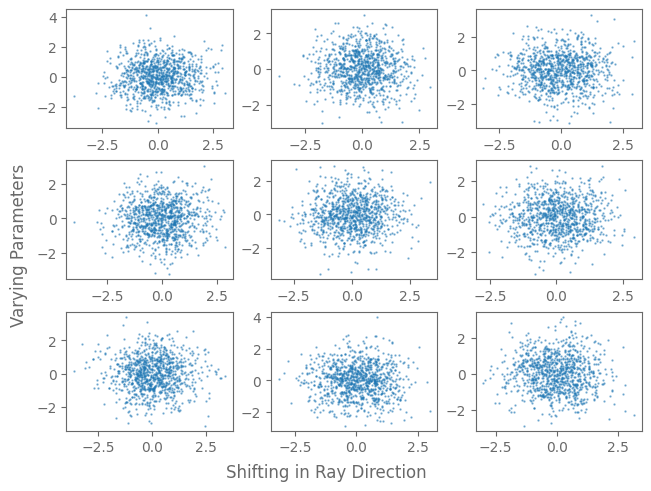

In [3]:
Plot.plot_data([torch.randn(3, 1000, 2) for i in range(3)])

### Fixed position

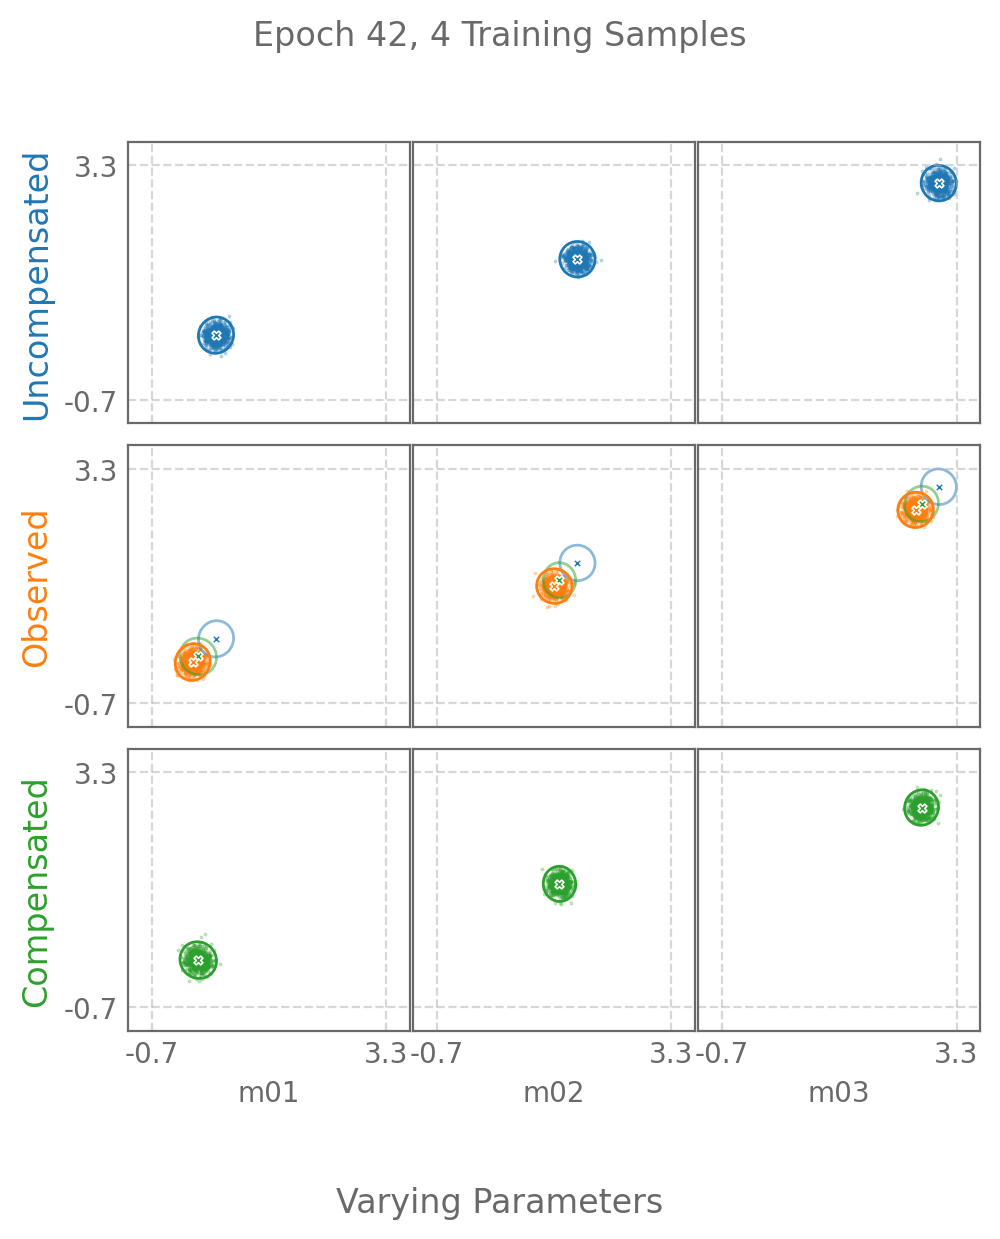

In [5]:
lims_x = (-2.0, 2.0)
lims_y = (-2.0, 2.0)
lims_x, lims_y = Plot.switch_lims_if_out_of_lim(target, lims_x=lims_x, lims_y=lims_y)
Plot.fixed_position_plot(
    compensated, target, without_compensation, lims_x, lims_y, epoch=42, training_samples_count=4, x_label=["m01", "m02", "m03"]
)

In [ ]:
Plot.fixed_position_plot(
    compensated[:1], target[:1], without_compensation[:1], (-2.0, 2.0), (-2.0, 2.0), epoch=12, training_samples_count=12
)

In [ ]:
Plot.compensation_plot(
    compensated, target, without_compensation, epoch=42, training_samples_count=20, covariance_ellipse=True
)

### Parameter comparison

In [ ]:

parameters = {
            "x_var": [-5., 5.],
            "y_var": [0., 10.],
            }
search_space = params_to_func(parameters)()
real_params = params_to_func({"x_var": 0, "y_var":5})()
predicted_params = params_to_func({"x_var": -2.5, "y_var":10.})()
Plot.plot_param_comparison(epoch=42, real_params=real_params, predicted_params=predicted_params, search_space=search_space, training_samples_count=4)

In [ ]:
Plot.fancy_ray(
    [target, compensated, without_compensation],
    ["Target", "Compensated", "Uncompensated"],
    z_index=[-1., 1., 4.]
)